# Introduction

This research notebook is trying to following the outline from our gitter room at [Pyanp Lobby](https://gitter.im/pythonanp/Lobby).  The steps, copied from that room are:

1. Define ratio distance between 2 matrices
2. Define ratio distance between a matrix and its pairwise comparison vector, call this function $r(M)$
3. Define a method of creating a universe of pairwise comparisons $U_n$ for the universe of nxn matrices to normalize wrt
4. Calculate the ratio distance for each $M \in U_n$, create that list of values, call it $r(U_n)$. This gives a list of values.
5. Calculate the percentile scores of each element of $r(U_n)$, call the percentile score of the matrix $M$ call it $p(M)$, and we then have a list of pairs $(r(M),p(M))$ for each $M\in U_n$. Call this list of pairs $N(U_n)$ for "normalization data of $U_n$"
6. Use $N(U_n)$ as our normalizer function, you could for instance just do piecewise linear on that data to convert any raw ratio distance to the percentile score.
7. Ideally look at plots of this data, to see if there is a function that would approximate....my guess is logistic
8. Hopefully find a pattern for the function approximation for large n's so we can have a general formula
9. Use $N(U_n)$ combined with Saaty inconsistency to compare the two measures
10. Discuss why this new measure is easier for users to understand the values of it

## Import needed libraries

In [1]:
from pyanp.priority import *
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12,7)

In [3]:
def ratio_dist(a, b, zero_uncmp=False):
    if (a == 0) or (b == 0):
        return 1
    else:
        return max(np.abs(a/b), np.abs(b/a))

def ratio_dist_mat(m1, m2, cmp_utm=True):
    rval = 1
    count = 0
    for row in range(len(m1)):
        for col in range(row+1):
            val=ratio_dist(m1[row,col], m2[row,col])
            if val != 0:
                rval *= val
                count += 1
    if count > 0:
        return rval ** (1.0/count)
    else:
        return 1

def ar_consistency(mat, pcalc=pri_eigen):
    pri = pcalc(mat)
    con_mat = ratio_mat(pri)
    return ratio_dist_mat(mat, con_mat)

def rnd_cmp_mat_exp(size, max_vote=9):
    rval = np.identity(size)
    max_exponent = np.log(max_vote)
    for row in range(size):
        for col in range(row+1, size):
            rval[row, col]=np.exp(rnd.random()*max_exponent)
            #Should we invert
            if rnd.random() > 0.5:
                rval[row,col] = 1/rval[row, col]
            rval[col, row] = 1/rval[row, col]
    return rval

def rnd_cmp_mat(size, max_vote=9):
    rval = np.identity(size)
    for row in range(size):
        for col in range(row+1, size):
            rval[row, col]=rnd.random()*(max_vote-1)+1
            #Should we invert
            if rnd.random() > 0.5:
                rval[row,col] = 1/rval[row, col]
            rval[col, row] = 1/rval[row, col]
    return rval

# Some initial calculations

## Let's calculate for a simple matrix

In [4]:
m1 = np.array([
    [1, 2, 5],
    [1/2, 1, 3],
    [1/6, 1/3, 1]
])
ar_consistency(m1)

1.0196202271791608

This result makes sense, the minimal value would be 1, and this is just a smidgen higher

## Let's calculate it for some random matrices

### Random 4x4 entries with values 1-9 including decimals and inverses

In [36]:
rnd_matrices = [rnd_cmp_mat(4) for i in range(1000)]

In [37]:
incons = [ar_consistency(mat) for mat in rnd_matrices]

In [38]:
from scipy.stats import percentileofscore

In [39]:
pers = [percentileofscore(incons, x) for x in incons]

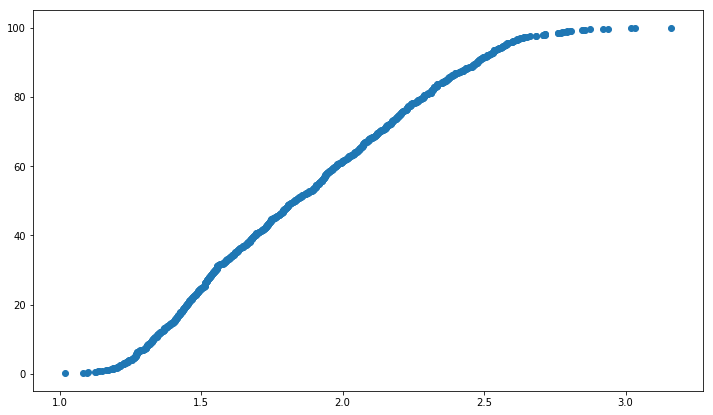

In [40]:
plt.scatter(incons, pers)
plt.show()

**Note:** That looks logistic-like, but not quite as pretty as one might hope

### Another set of 5x5s to see if random noise changes the shape

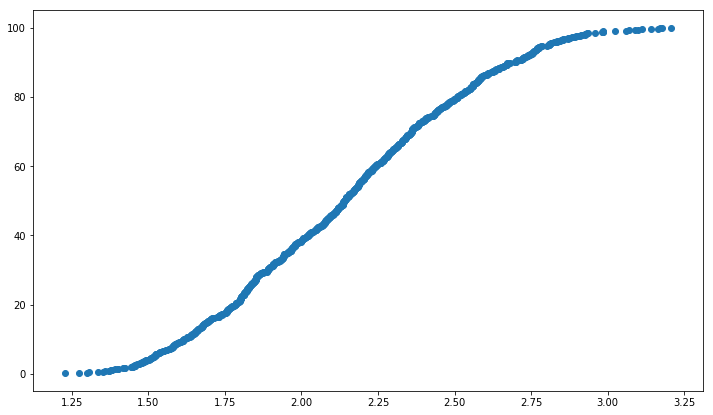

In [41]:
rnd_matrices = [rnd_cmp_mat(5) for i in range(1000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

### 6x6 next

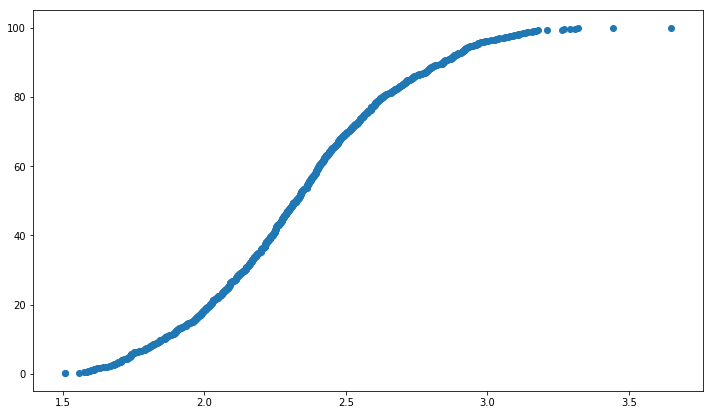

In [42]:
rnd_matrices = [rnd_cmp_mat(6) for i in range(1000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

### 7x7

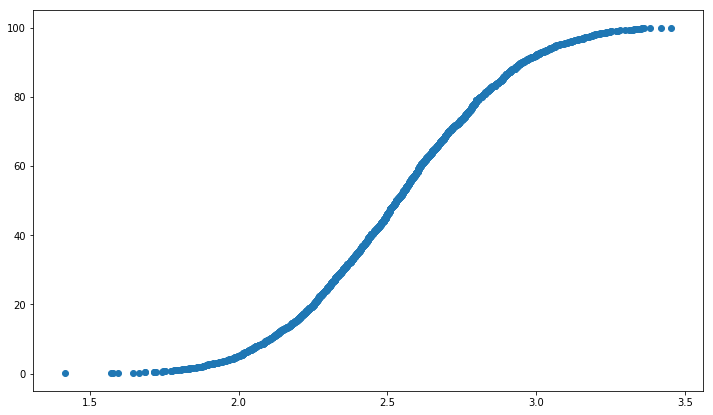

In [43]:
rnd_matrices = [rnd_cmp_mat(7) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

### 8x8

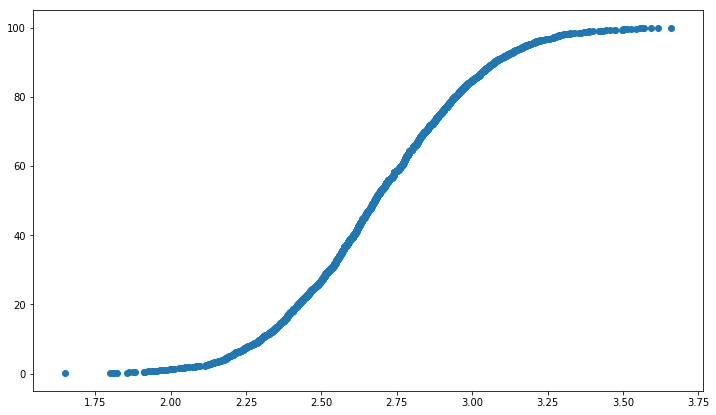

In [44]:
rnd_matrices = [rnd_cmp_mat(8) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

### 10x10

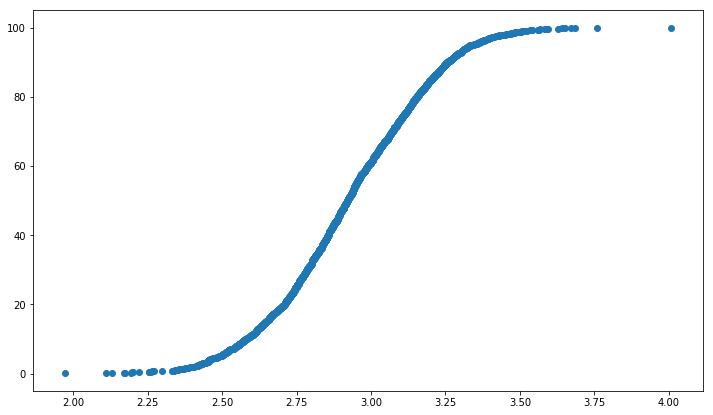

In [45]:
rnd_matrices = [rnd_cmp_mat(10) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

### 15x15

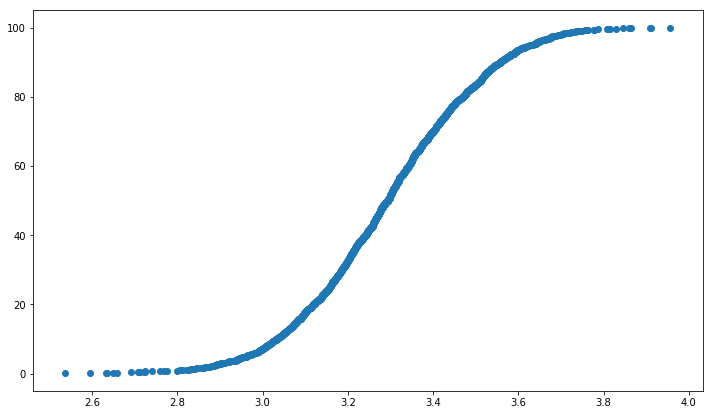

In [46]:
rnd_matrices = [rnd_cmp_mat(15) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

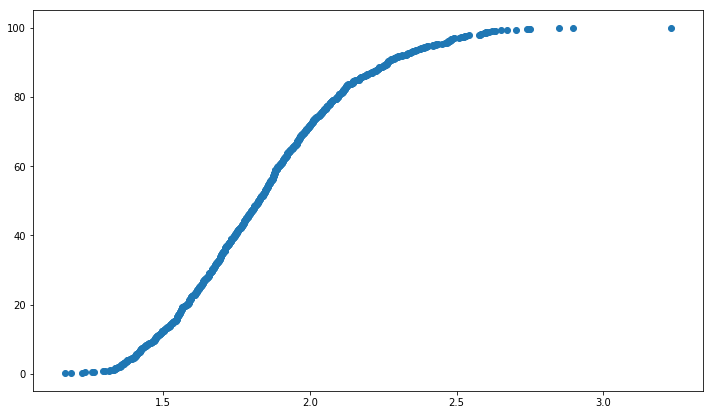

In [16]:
rnd_matrices = [rnd_cmp_mat_exp(5, 10) for i in range(1000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()

### 15x15 with entries up to 18

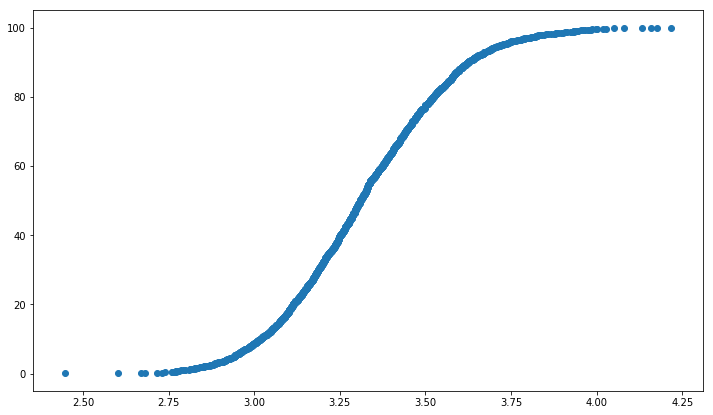

3.154466510910998

3.3100623937345546

3.4807160374586976

In [47]:
rnd_matrices = [rnd_cmp_mat_exp(15, 18) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()
display(np.percentile(incons, 25))
display(np.percentile(incons, 50))
display(np.percentile(incons, 75))

# It looks logistic

The graphs we've seen look incredibily logistic.  Our next step is to find a logistic function that matches our data.  Since we are working with percentiles, a simple first approximation has:

* Lower Aysmptote of 0
* Upper Asymptote of 100
* x inflection at the 50th percentile value
* And then use the 75th percentile value to solve for the last logistic parameter

## Logistic formula with 75% level
Let's find the equation for a logistic defined standardly as
$$f(x)=\frac{a}{1+exp(b(x-x_{infl}))} + y_{\min}$$

Note that $a+y_{\min}=y_{\max}$, or in other words $a=y_{\min} - y_{\max}$.

We need to use the 75% level next:
$$f(x_{75})=0.75(y_{\max} - y_{\min}) + y_{\min} = y_{75}$$
$$\frac{a}{1+exp(b(x_{75}-x_{infl}))} + y_{\min} = y_{75}$$
$$\frac{a}{y_{75}-y_{\min}} = 1 + exp(b(x_{75}-x_{infl}))$$
$$\frac{a}{y_{75}-y_{\min}} - 1 = exp(b(x_{75}-x_{infl}))$$
$$\ln\left(\frac{a}{y_{75}-y_{\min}} - 1\right) = b(x_{75}-x_{infl})$$
$$\ln\left(\frac{a}{y_{75}-y_{\min}} - 1\right)\frac{1}{x_{75}-x_{infl}} = b$$

In [48]:

def logistic2(x, xinfl, x75, ymin, ymax):
    d = ymin
    a = ymax - ymin
    c = xinfl
    y75 = 0.75*(ymax-ymin) + ymin
    b = np.log(abs(a/(y75-ymin)-1))/(x75-xinfl)
    return a/(1+np.exp(b*(x-c))) + d
    

In [50]:
#A quick test, should spit back 0.75
logistic2(2, 1, 2, 0, 1)

0.75

## An experiment using that logistic

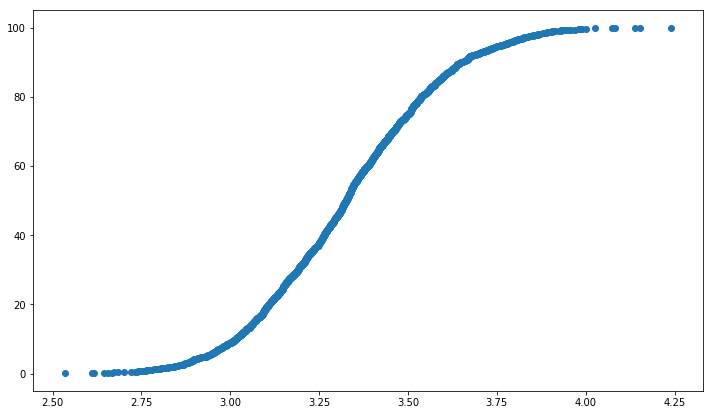

3.1490460194641887

3.325772665167909

3.5005443482700054

In [51]:
rnd_matrices = [rnd_cmp_mat_exp(15, 18) for i in range(2000)]
incons = [ar_consistency(mat) for mat in rnd_matrices]
pers = [percentileofscore(incons, x) for x in incons]
plt.scatter(incons, pers)
plt.show()
display(np.percentile(incons, 25))
display(np.percentile(incons, 50))
display(np.percentile(incons, 75))

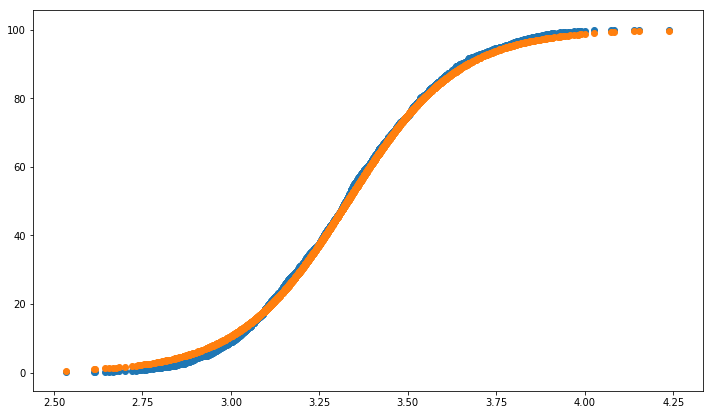

In [52]:
fx = lambda x: logistic2(x, 3.33, 3.5, 0, 100)
preds = [fx(x) - fx(1) for x in incons]
plt.scatter(incons, pers)
plt.scatter(incons, preds)

**NOTE:** That is a pretty incredible match

## More simulations (define the function)
This went so well, let's define a simulation function so we can try it repeatedly

In [23]:
def simulate(size, max_vote=18, nmats=1500):
    rnd_matrices = [rnd_cmp_mat_exp(size, max_vote) for i in range(nmats)]
    incons = [ar_consistency(mat) for mat in rnd_matrices]
    indices = np.argsort(incons)
    rnd_matrices = [rnd_matrices[i] for i in indices]
    incons = [incons[i] for i in indices]
    pers = [percentileofscore(incons, x) for x in incons]
    x25 = np.percentile(incons, 50)
    xinfl = np.percentile(incons, 50)
    x75=np.percentile(incons, 75)
    avg = (x75 - x25)/2
    x75_better = xinfl+avg
    preds = np.array([logistic2(x, xinfl, x75, 0, 100) for x in incons])
    low = min(preds)
    up = 100
    preds = (preds - low)/(up - low) * 100
    plt.plot(incons, pers, "r-", label="Raw Data")
    plt.plot(incons, preds, "b--", label="Exponential Prediction")
    plt.legend()
    plt.show()

## Simulate 5x5 several times

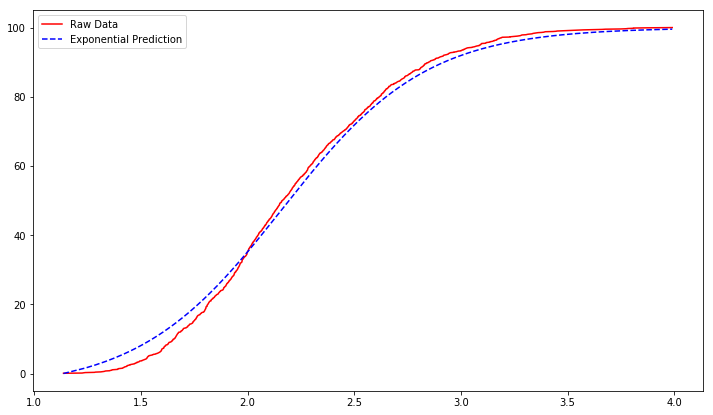

In [53]:
simulate(5)

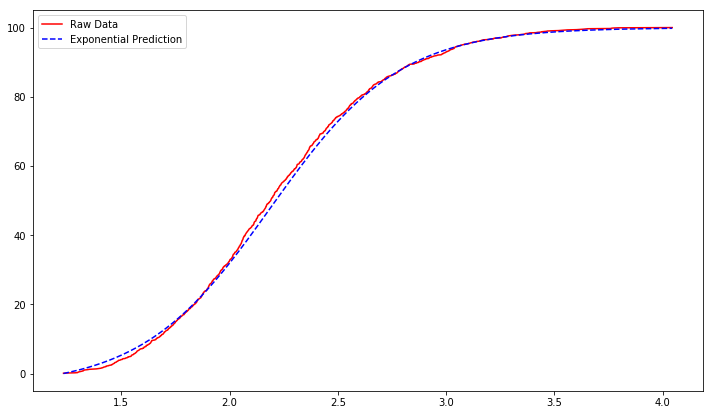

In [54]:
simulate(5)

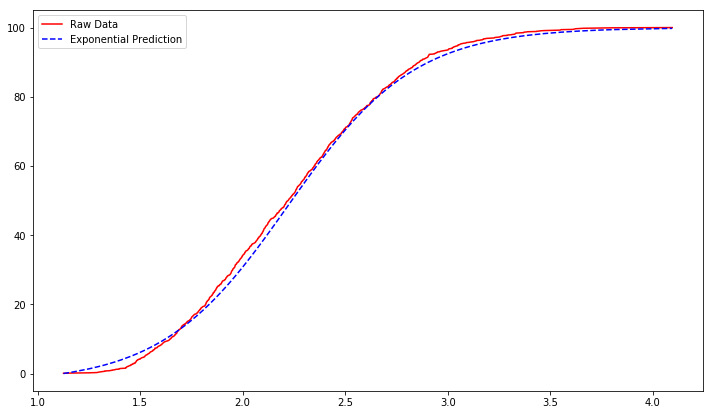

In [55]:
simulate(5)

## Simulate 3x3s

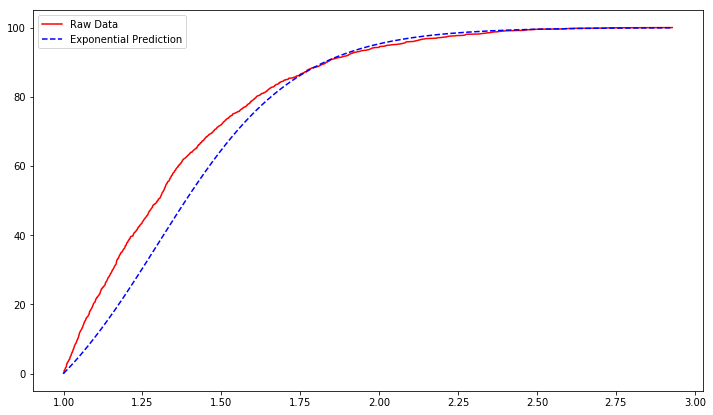

In [56]:
simulate(3,9)

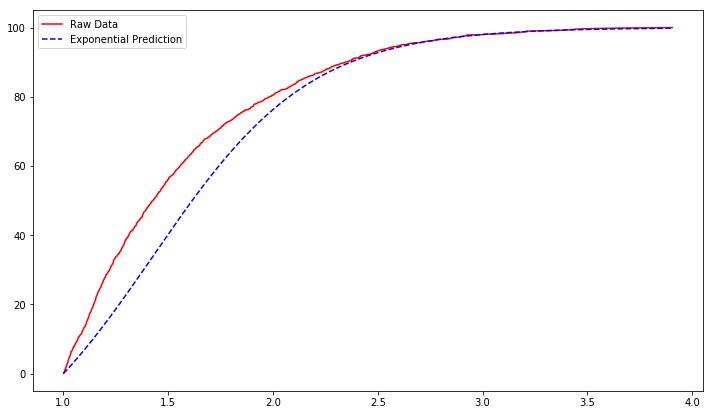

In [57]:
simulate(3, 20)

## Simulate 4x4s

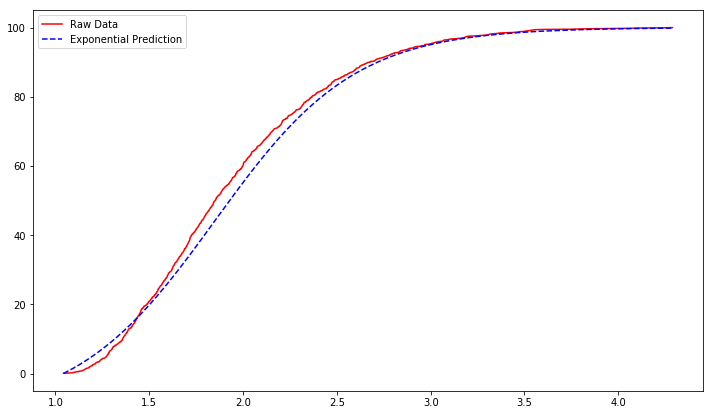

In [58]:
simulate(4)

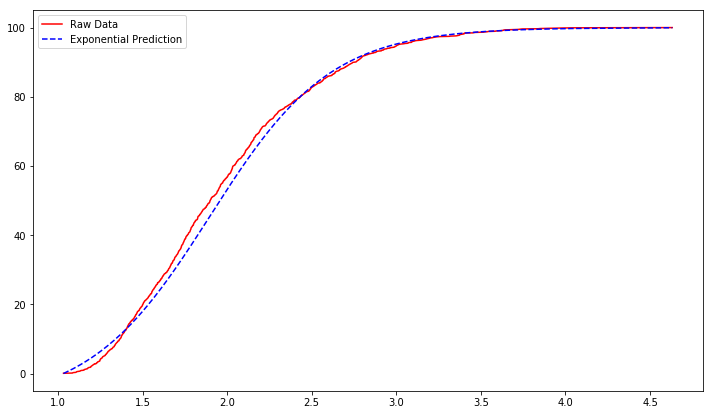

In [59]:
simulate(4, 20)